# mBuild Tutorial 08: Building Polymers

This tutorial demonstrates how to build polymers using the built-in `Polymer` class.

As in the prior tutorials, we need to first import mbuild (here as `mb`), import the visualization routines (as `visualize`), and apply the matplotlib command to redirect plots to the notebook window.

In [1]:
%matplotlib notebook
from visualize import visualize
import mbuild as mb

In the prior tutorials we created a class for constructing a linear alkane chain and also used a similar built-in `Alkane` class. One could imagine that the same approach we took to create this class (i.e. successively adding CH2 units) could be further generalized to support the creation of any linear polymer. In fact, mBuild contains a class that does just this, `mbuild.Polymer`.

Here, we'll explore how `Polymer` works by creating the familiar linear alkane, along with a PEG (polyethylene glycol) molecule. 

To be flexible, the `Polymer` class accepts, as arguments, repeat units (defined as `Compounds`), thus we will first define `Compound` classes for our CH2 and oxygen monomer units (with the appropriate `Ports`).

In [4]:
class CH2(mb.Compound):
    def __init__(self):
        super(CH2, self).__init__()
        
        mb.load('ch2.pdb', compound=self)
        carbon = list(self.particles_by_name('C'))[0]
        up_port = mb.Port(anchor=carbon, orientation=[0, 0, 1], separation=0.075)
        down_port = mb.Port(anchor=carbon, orientation=[0, 0, -1], separation=0.075)
        self.add(up_port, label='up')
        self.add(down_port, label='down')

class O(mb.Compound):
    def __init__(self):
        super(O, self).__init__()
        
        self.add(mb.Particle(name='O'))
        up_port = mb.Port(anchor=self[0], orientation=[0, 0, 1], separation=0.075)
        self.add(up_port, 'up')
        down_port = mb.Port(anchor=self[0], orientation=[0, 0, -1], separation=0.075)
        self.add(down_port, 'down')

To create a simple linear alkane, we would need to simply pass CH2 as the monomer. 
- `n` defines the number of times this is repeated. 
- The `port_labels` argument tells mBuild the names of the two `Ports` to connect when stitching together the polymer.

Note, this function does not place end caps; one could easily write a custom class for a specific family that calls the polymer class and adds the appropriate end caps. We are currently working on adding this functionality to the `Polymer` class, so expect this to be included in an upcoming mBuild release.

<IPython.core.display.Javascript object>


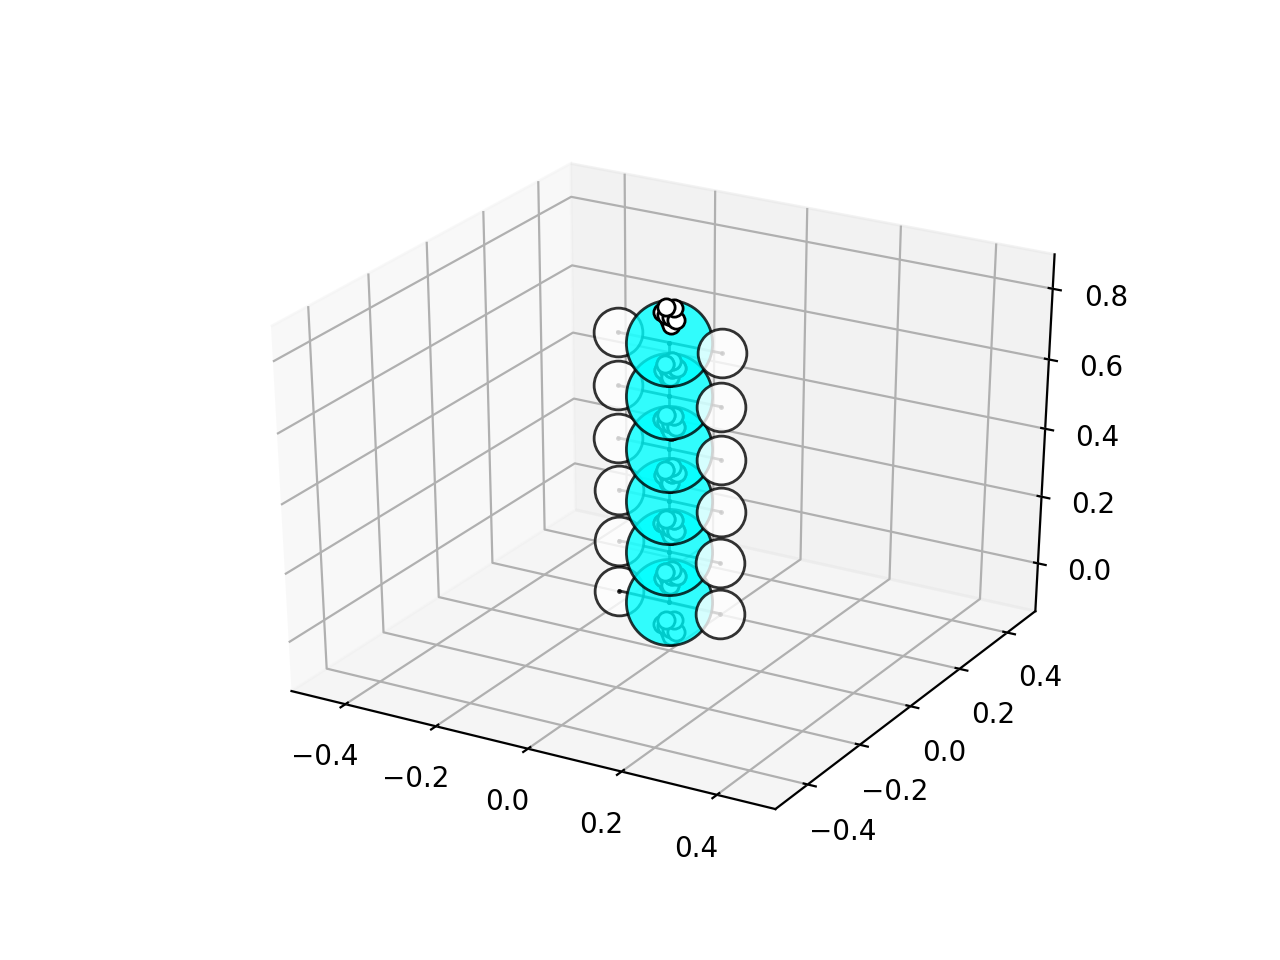

In [8]:
alkane = mb.Polymer(monomers=CH2(), n=6, port_labels=('up', 'down'))
visualize(alkane)

To create PEG, we will now feed instances of both of the monomers (i.e. `CH2` and `O`) to the `monomers` argument of the `Polymer` class. 

We also need to provide a few additional arguments. 
- `sequence` provides a string of characters where each unique character represents one repetition of a monomer. Here, `AAB` means that we want two `CH2`'s for each `O` (`CH2` is defined as `A` because it is passed first, `O` is `B` as it is second).  
- As before, the `n` argument specifies the number of repeat units, however in this case, it is how many times to repeat the pattern.  That is, `n=1` would define a two `CH2` groups and an `O`.  

<IPython.core.display.Javascript object>


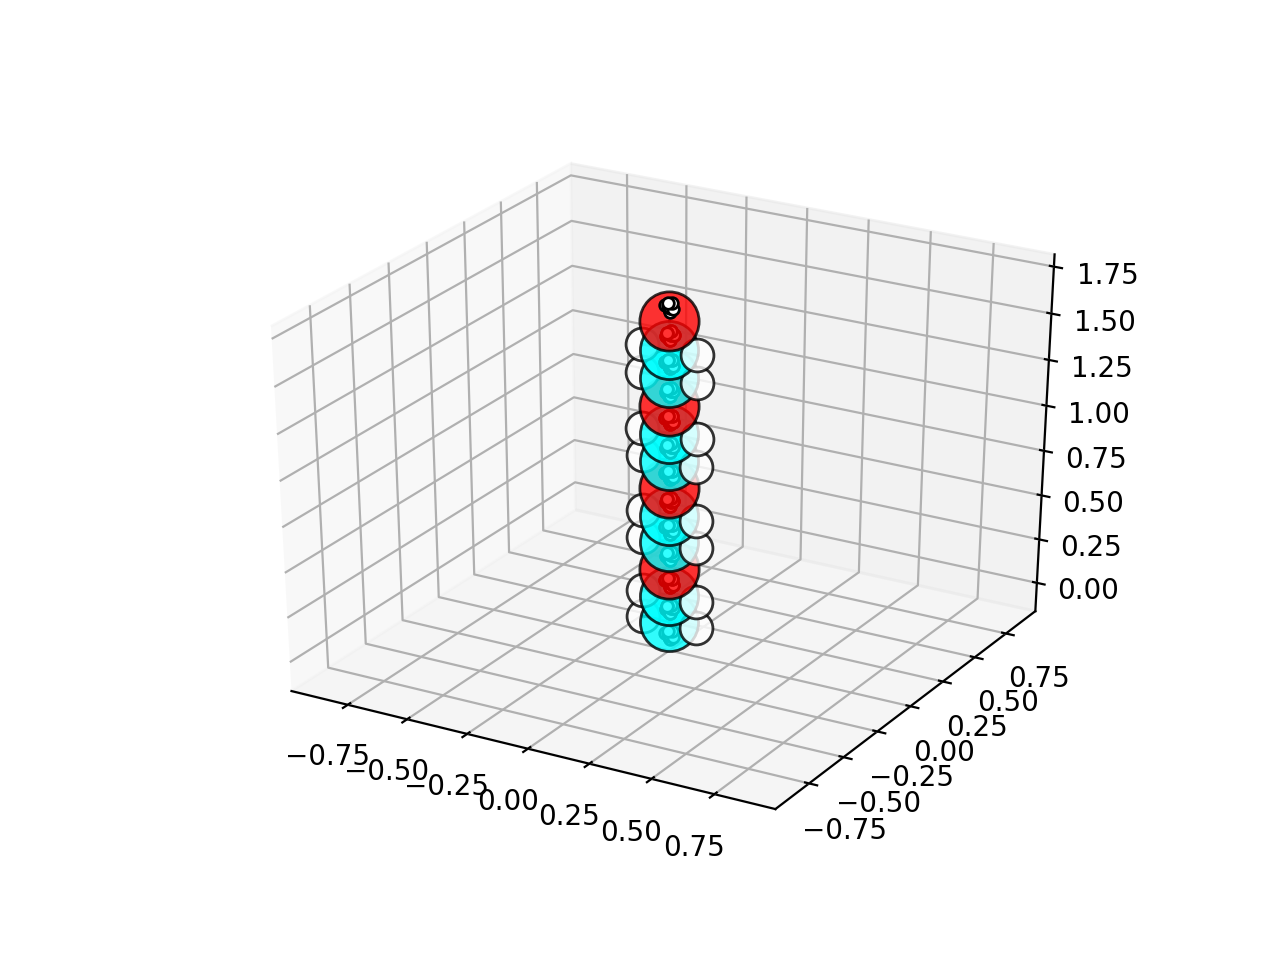

In [9]:
peg4 = mb.Polymer(monomers=(CH2(), O()), sequence='AAB', n=4, port_labels=('up', 'down'))
visualize(peg4)

The sequence argument can be defined with any arbitrary pattern.  For example, while not realistic from a chemistry standpoint, one could trivially create a rather complex sequence, such as `AABAABBBB`.

<IPython.core.display.Javascript object>


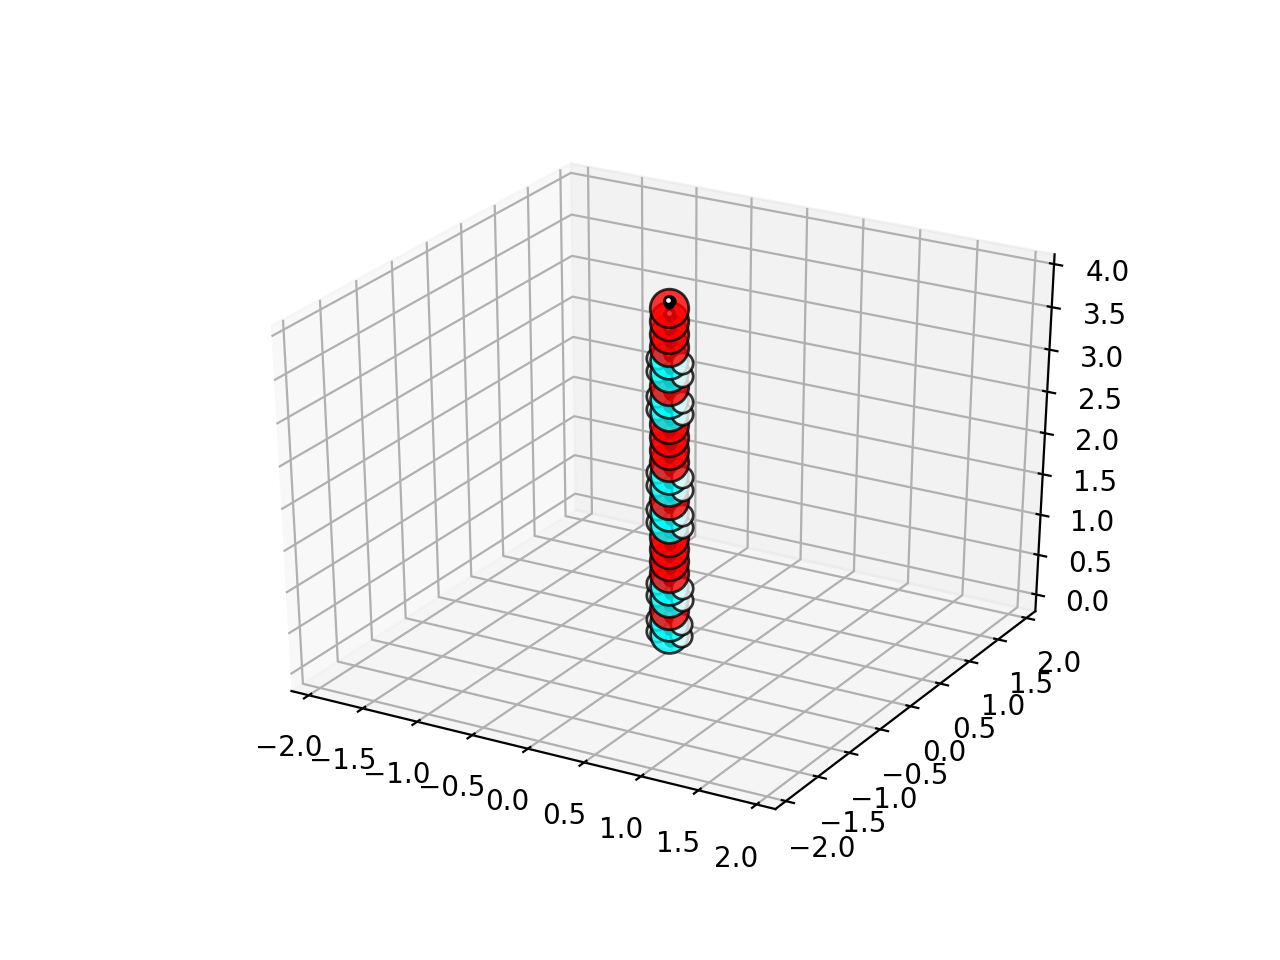

In [10]:
polymer = mb.Polymer(monomers=(CH2(), O()), sequence='AABAABBBB', n=3, port_labels=('up', 'down'))
visualize(polymer)

Let us now consider creating a semifluorinated alkane using the polymer class (i.e., one half is an alkane, R_H, the other half is a perfluroalkane, R_F).  We first need to define a CF2 group, in the same way we defined CH2.

<IPython.core.display.Javascript object>


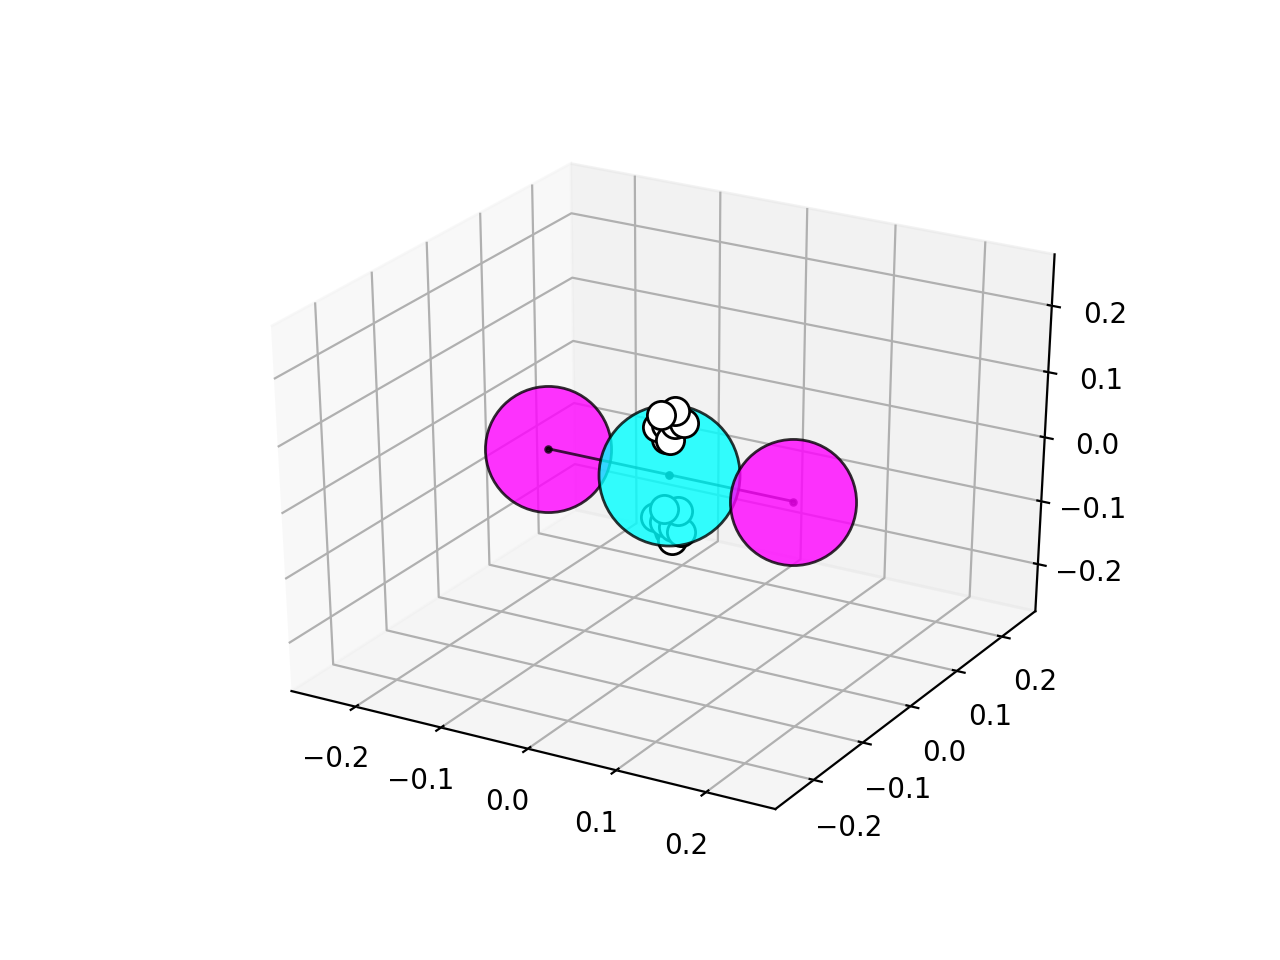

In [13]:
class CF2(mb.Compound):
    def __init__(self):
        super(CF2, self).__init__()
        
        mb.load('cf2.pdb', compound=self)
        carbon = list(self.particles_by_name('C'))[0]
        up_port = mb.Port(anchor=carbon, orientation=[0, 0, 1], separation=0.075)
        down_port = mb.Port(anchor=carbon, orientation=[0, 0, -1], separation=0.075)
        self.add(up_port, label='up')
        self.add(down_port, label='down')


visualize(CF2())

There are multiple ways to create the semifluorinated alkane; here we will consider two different approaches that make use of polymer class.  First, we simply define the sequence to describe the entire polymer, setting `n=1`.

<IPython.core.display.Javascript object>


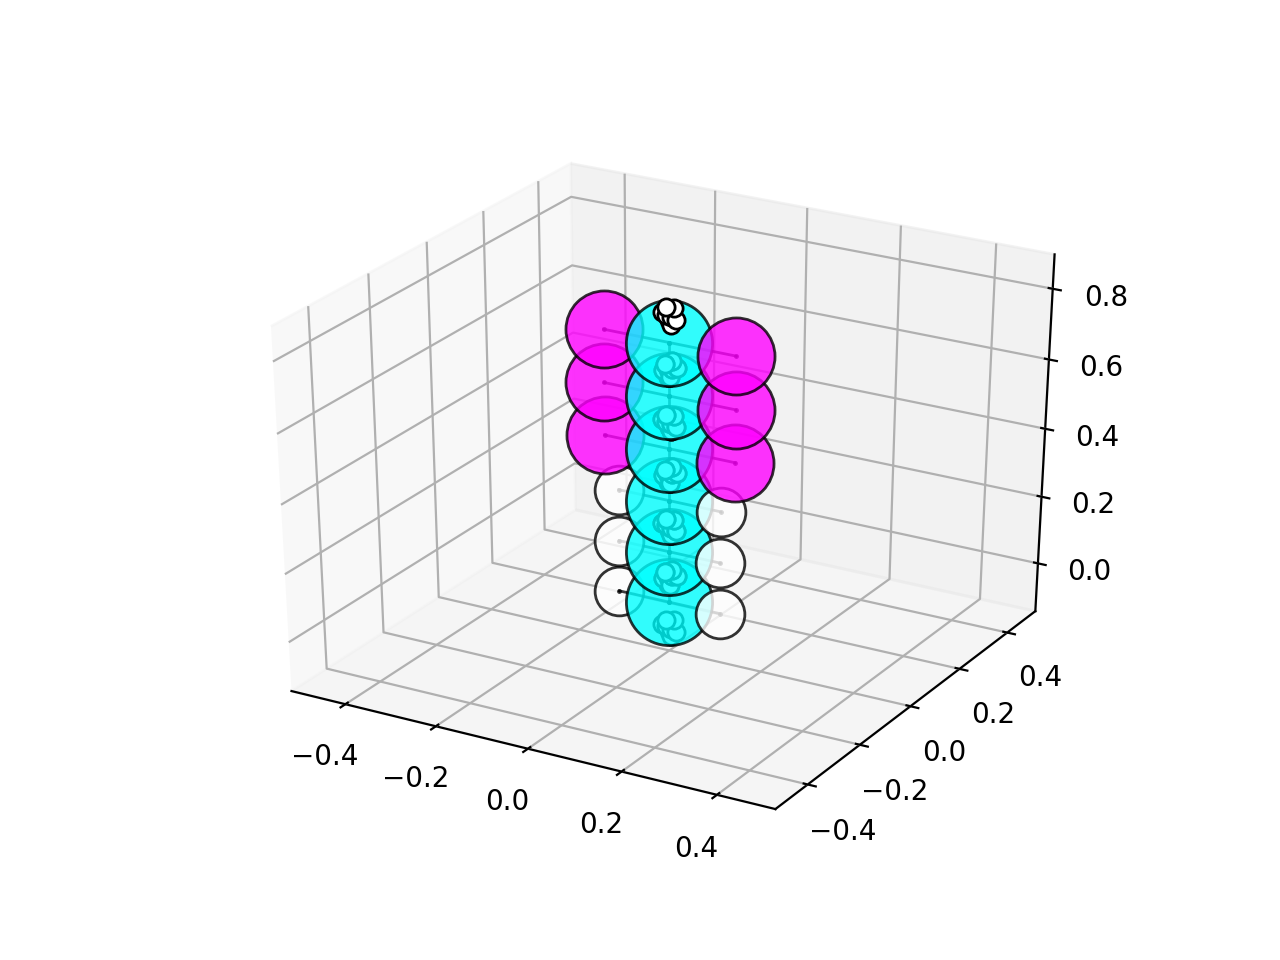

In [15]:
semifluorinated_hexane = mb.Polymer(monomers=(CH2(), CF2()), sequence='AAABBB', n=1, port_labels=('up', 'down'))
visualize(semifluorinated_hexane)

The approach above works fine, but requires changing the sequence argument to adjust the length of each block in the polymer.  

Alternatively, we can take advantage of the flexible nature of mBuild, in that the `Polymer` class outputs `Compounds` and can accept as input `Compounds` (i.e., it is not limited to simple monomers). 

As such, let us call the `Polymer` class 3 times
- create the alkane block
- create the fluorinated block
- stitch the two blocks together


<IPython.core.display.Javascript object>


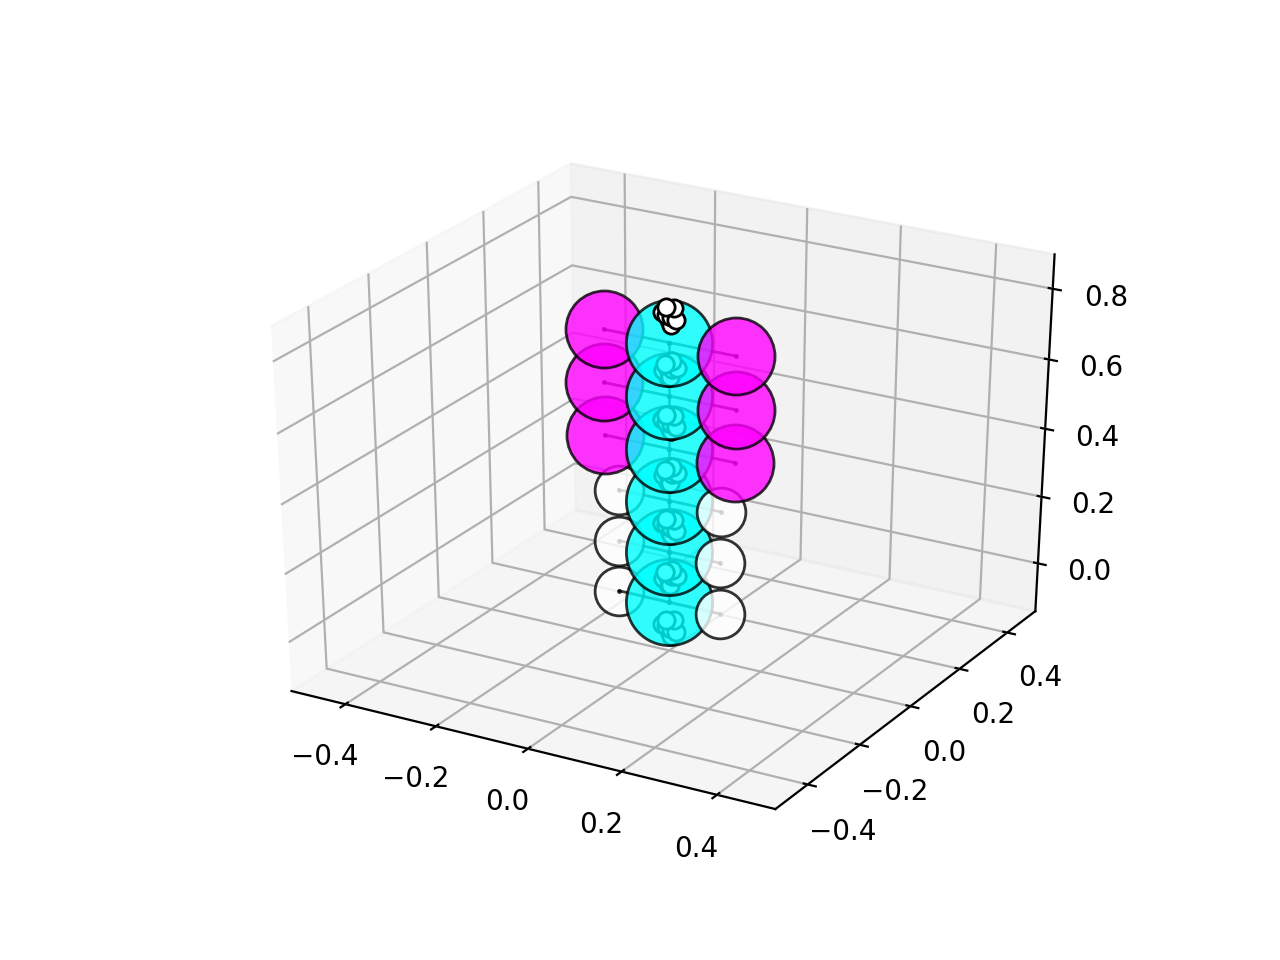

In [17]:
alkane_block = mb.Polymer(monomers=CH2(), n=3, port_labels=('up', 'down'))
pfa_block = mb.Polymer(monomers=CF2(), n=3, port_labels=('up', 'down'))

semifluorinated_hexane = mb.Polymer(monomers=(alkane_block, pfa_block), sequence='AB', n=1, port_labels=('up', 'down'))


visualize(semifluorinated_hexane)

This of course can be wrapped in a flexible class that takes the length of each block as an argument, similar to what has been done in prior tutorials.  

<IPython.core.display.Javascript object>


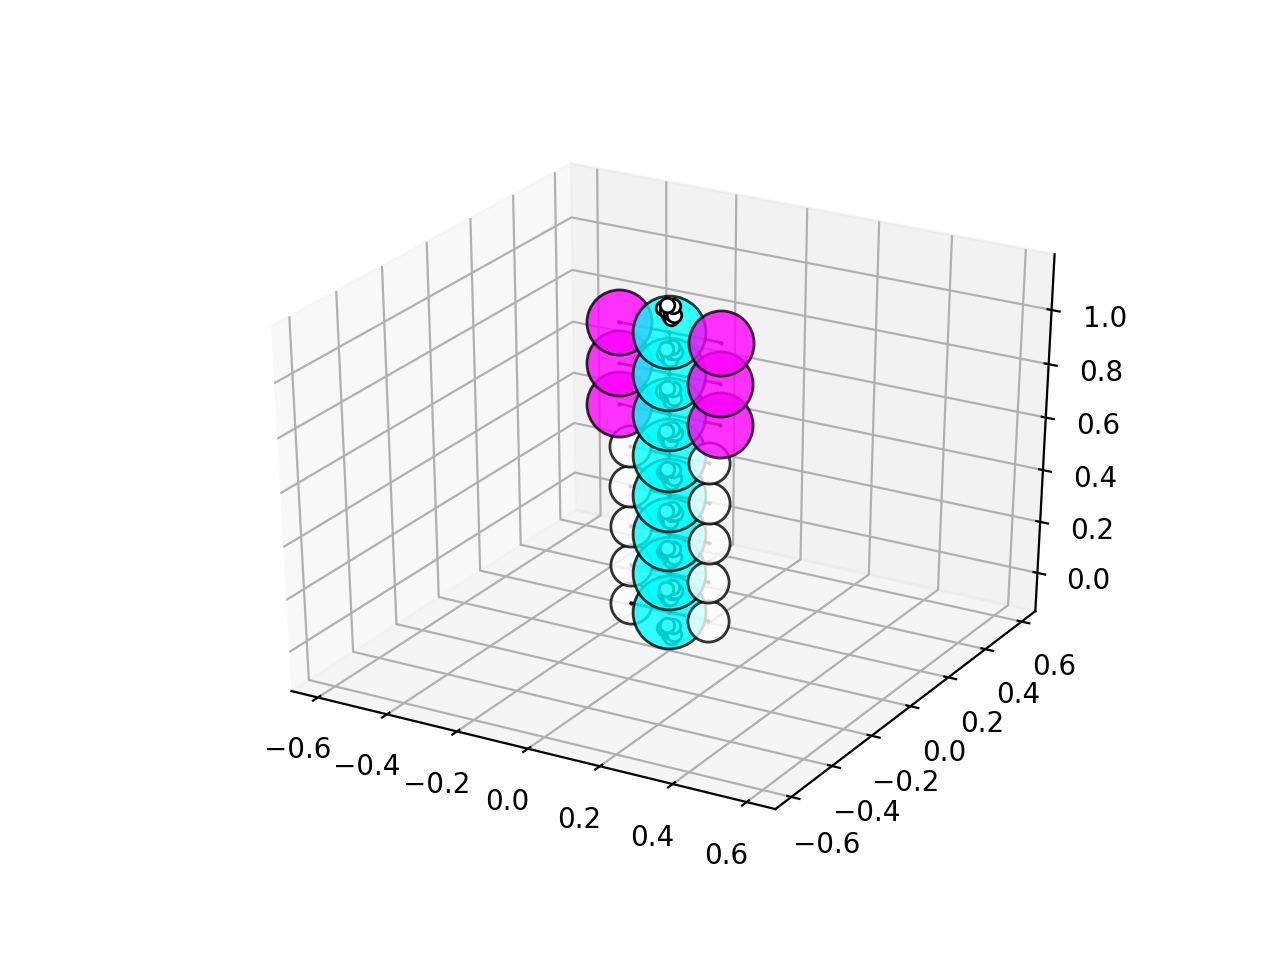

In [25]:
class Semifluorinated(mb.Compound):
    def __init__(self, alkane_length, pfa_length):
        super(Semifluorinated, self).__init__()
        
        
        alkane_block = mb.Polymer(monomers=CH2(), n=alkane_length, port_labels=('up', 'down'))
        pfa_block = mb.Polymer(monomers=CF2(), n=pfa_length, port_labels=('up', 'down'))

        semifluorinated_hexane = mb.Polymer(monomers=(alkane_block, pfa_block), sequence='AB', n=1, port_labels=('up', 'down'))        
        self.add(semifluorinated_hexane)

semifluorinated_alkane = Semifluorinated(alkane_length = 5, pfa_length = 3)
visualize(semifluorinated_alkane)